In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/reviews_with_sentiment_and_themes.csv')

In [4]:
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())

Rows, Columns: (2135, 11)

Columns: ['review', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'cleaned_review', 'lemmatized', 'topic', 'theme']


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())

In [ ]:
print("\nReviews per bank_id:")
print(df['bank'].value_counts(dropna=False))

In [ ]:
print("\nSentiment label counts:")
print(df['sentiment_label'].value_counts(dropna=False))

In [ ]:
print("\nSentiment score stats:")
print(df['sentiment_score'].describe())

In [ ]:
print("\nRating value counts:")
print(df['rating'].value_counts(dropna=False).sort_index())

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if any dates failed to parse
print("Failed date conversions:", df['date'].isnull().sum())

Failed date conversions: 0


In [23]:
df['rating'] = df['rating'].astype(int)

# Strip leading/trailing spaces in text columns
df['review'] = df['review'].str.strip()
df['cleaned_review'] = df['cleaned_review'].str.strip()

# Verify bank_id is string
df['bank'] = df['bank'].astype(str)

# Quick look after cleaning
display(df.head(6))
print("\nData types after cleaning:")
print(df.dtypes)

,review,rating,date,bank,source,sentiment_label,sentiment_score,cleaned_review,lemmatized,topic,theme
0,this application is very important and advanta...,5,2025-11-27,CBE,Google Play Store,POSITIVE,0.998468,this application is very important and advanta...,application important advantage transfer money...,1,Transaction & Service Reliability Issues
1,why didn't work this app?,1,2025-11-27,CBE,Google Play Store,NEGATIVE,0.999132,why didnt work this app,not work app,0,App Malfunction & Technical Bugs
2,the app makes our life easier. thank you cbe!,5,2025-11-27,CBE,Google Play Store,POSITIVE,0.999696,the app makes our life easier thank you cbe,app make life easy thank cbe,1,Transaction & Service Reliability Issues
3,this app very bad 👎,1,2025-11-27,CBE,Google Play Store,NEGATIVE,0.999797,this app very bad 👎,app bad,1,Transaction & Service Reliability Issues
4,the most advanced app. but how to stay safe?,5,2025-11-27,CBE,Google Play Store,NEGATIVE,0.956509,the most advanced app but how to stay safe,advanced app stay safe,2,"User Experience, Features & Security"
5,good application,4,2025-11-27,CBE,Google Play Store,POSITIVE,0.999855,good application,good application,4,App Performance (Speed & Quality)



Data types after cleaning:
review                     object
rating                      int64
date               datetime64[ns]
bank                       object
source                     object
sentiment_label            object
sentiment_score           float64
cleaned_review             object
lemmatized                 object
topic                       int64
theme                      object
dtype: object


In [24]:
bank_counts = df.groupby('bank')['review'].count()
print("Reviews per bank:\n", bank_counts)

Reviews per bank:
 bank
BOA       780
CBE       747
Dashen    608
Name: review, dtype: int64


In [ ]:
theme_counts = df.groupby(['bank', 'theme'])['review'].count().unstack().fillna(0)
print("Theme distribution per bank:\n", theme_counts)


## Overview of Sentiments

In [12]:
# Count of sentiments per bank
sentiment_count = df.groupby(['bank', 'sentiment_label']).size().unstack()
sentiment_count

sentiment_label,NEGATIVE,POSITIVE
bank,,
BOA,559,221
CBE,339,408
Dashen,214,394


## Theme Distribution

In [13]:
# Count of themes per bank
theme_count = df.groupby(['bank', 'theme']).size().unstack().fillna(0)
theme_count

theme,App Malfunction & Technical Bugs,App Performance (Speed & Quality),Highly Positive Feedback & Brand Perception,Transaction & Service Reliability Issues,"User Experience, Features & Security"
bank,,,,,
BOA,385,143,47,145,60
CBE,294,208,77,103,65
Dashen,151,140,145,62,110


# Visualization 1 – Theme Distribution (Bar plot)

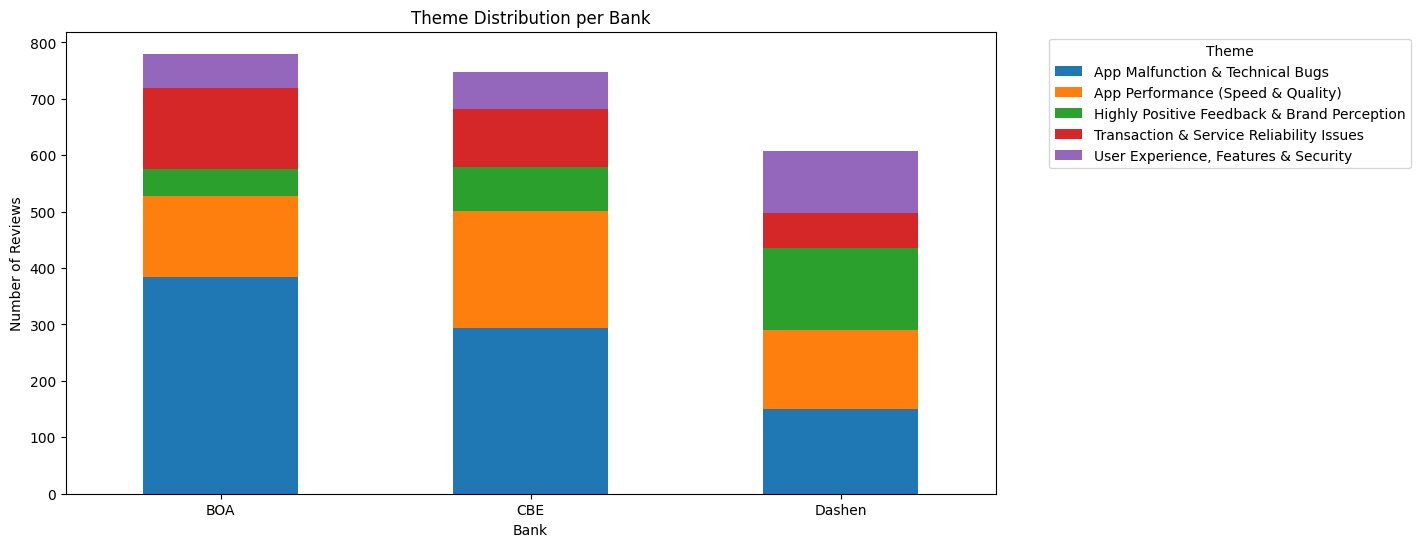

In [14]:
# Plot stacked bar chart
theme_count.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Theme Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.xticks(rotation=0)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1))
plt.show()

Visualization 2 – Sentiment Distribution (Stacked Bar)

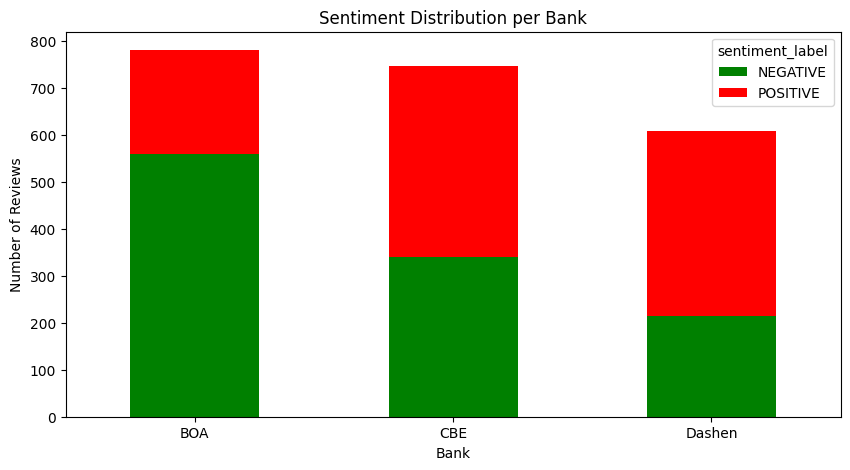

In [15]:
# Stacked bar for sentiment per bank
sentiment_count.plot(kind='bar', stacked=True, figsize=(10,5), color=['green','red','gray'])
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.xticks(rotation=0)
plt.show()


# Keyword Clouds

In [16]:
# Function to generate word cloud
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Example: Word cloud for negative reviews of CBE
plot_wordcloud(df[(df['bank']=='CBE') & (df['sentiment_label']=='NEGATIVE')]['lemmatized'],
               "CBE - Negative Review Keywords")


NameError: name 'WordCloud' is not defined